# DATA EXTRACTION
* I download my chees game history pgn file from Lichess website

In [18]:
import pandas as pd

# Open the PGN file with the correct encoding
file_path = 'my_lichess_history.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    games = []
    game_data = {}
    moves = []

    for line in file:
        line = line.strip()

        if line.startswith("["):
            # Extract key-value pairs from the PGN metadata lines
            key_value = line[1:-1].split(" ", 1)
            key = key_value[0]
            value = key_value[1].strip('"')
            game_data[key] = value

        elif line == "":
            # End of one game, store the data and reset
            if game_data:
                game_data["Moves"] = " ".join(moves)  # Add moves to the game data

                # Ensure WhiteTitle and BlackTitle exist, fill with NaN if missing
                if "WhiteTitle" not in game_data:
                    game_data["WhiteTitle"] = None
                if "BlackTitle" not in game_data:
                    game_data["BlackTitle"] = None

                games.append(game_data)
                game_data = {}
                moves = []

        else:
            # Collect moves (non-metadata lines)
            moves.append(line)

    # Append the last game if the file doesn't end with an empty line
    if game_data:
        game_data["Moves"] = " ".join(moves)

        # Ensure WhiteTitle and BlackTitle exist, fill with NaN if missing
        if "WhiteTitle" not in game_data:
            game_data["WhiteTitle"] = None
        if "BlackTitle" not in game_data:
            game_data["BlackTitle"] = None

        games.append(game_data)

# Convert the parsed data into a DataFrame
df = pd.DataFrame(games)

# Display the DataFrame
df.reset_index(drop=True, inplace=True)
df



,Event,Site,Date,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,...,BlackRatingDiff,BlackTitle,Variant,TimeControl,ECO,Termination,Moves,WhiteTitle,FEN,SetUp
0,Rated bullet game,https://lichess.org/oECdV8Ew,2024.12.12,VladTheBest,legend2014,1-0,2024.12.12,18:01:22,2919,3050,...,-8,FM,Standard,60+0,A56,Normal,,None,NaN,NaN
1,Rated bullet game,https://lichess.org/f6smS9O0,2024.12.12,legend2014,sid-al_1979,0-1,2024.12.12,17:58:13,3059,2754,...,+10,FM,Standard,60+0,B51,Normal,1. d4 Nf6 2. c4 c5 3. dxc5 e6 4. Nf3 Bxc5 5. e...,FM,NaN,NaN
2,Rated bullet game,https://lichess.org/vi4fXJ2z,2024.12.12,SantosBarrios,legend2014,0-1,2024.12.12,15:24:25,2820,3057,...,+2,FM,Standard,60+0,B20,Time forfeit,1. e4 c5 2. Nf3 d6 3. Bb5+ Nd7 4. O-O Nf6 5. R...,None,NaN,NaN
3,Rated bullet game,https://lichess.org/csbBQelA,2024.12.12,legend2014,stdcout,1-0,2024.12.12,12:55:22,3053,2936,...,-4,None,Standard,60+0,B30,Normal,1. e4 c5 2. b3 Nc6 3. Bb2 Nf6 4. e5 Nd5 5. Nf3...,FM,NaN,NaN
4,Rated bullet game,https://lichess.org/ZJJpFq73,2024.12.12,legend2014,WhatWouldMorphyDo,1-0,2024.12.12,12:37:25,3050,2859,...,-3,None,Standard,60+0,B52,Time forfeit,1. e4 c5 2. Nf3 Nc6 3. Bb5 Nd4 4. Nxd4 cxd4 5....,FM,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28833,Hourly SuperBlitz Arena,https://lichess.org/yKOXTWzj,2016.05.12,Capi_Capitan,legend2014,0-1,2016.05.12,19:00:01,1727,1767,...,+112,FM,Standard,180+0,B90,Normal,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,None,NaN,NaN
28834,Rated blitz game,https://lichess.org/zQJ6lCcd,2016.05.12,legend2014,chg2015,1-0,2016.05.12,18:45:56,1500,1647,...,-10,None,Standard,300+4,C41,Normal,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,FM,NaN,NaN
28835,Casual King of the Hill game,https://lichess.org/k4mkYkyl,2016.05.12,legend2014,lichess AI level 1,0-1,2016.05.12,18:28:18,1500,?,...,NaN,None,King of the Hill,-,B01,Normal,1. e4 e5 2. Nf3 d6 3. Bc4 Bg4 4. Nc3 Nc6 5. Nx...,FM,NaN,NaN
28836,Casual King of the Hill game,https://lichess.org/GCwIRafb,2016.05.12,lichess AI level 1,legend2014,0-1,2016.05.12,18:27:39,?,1500,...,NaN,FM,King of the Hill,-,B01,Normal,1. e4 d5 2. exd5 Qxd5 3. Nc3 Qd4 4. Nf3 Qd6 5....,None,NaN,NaN


# DATA PREPROCESSING
- I removed columns that I believed useless for my data analysis such as website
- I add a new column which shows result of the game "Win", "Loss" or "Draw"
- Also I reordered the columns for convenience

In [19]:
df.head(5)

,Event,Site,Date,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,...,BlackRatingDiff,BlackTitle,Variant,TimeControl,ECO,Termination,Moves,WhiteTitle,FEN,SetUp
0,Rated bullet game,https://lichess.org/oECdV8Ew,2024.12.12,VladTheBest,legend2014,1-0,2024.12.12,18:01:22,2919,3050,...,-8,FM,Standard,60+0,A56,Normal,,None,NaN,NaN
1,Rated bullet game,https://lichess.org/f6smS9O0,2024.12.12,legend2014,sid-al_1979,0-1,2024.12.12,17:58:13,3059,2754,...,+10,FM,Standard,60+0,B51,Normal,1. d4 Nf6 2. c4 c5 3. dxc5 e6 4. Nf3 Bxc5 5. e...,FM,NaN,NaN
2,Rated bullet game,https://lichess.org/vi4fXJ2z,2024.12.12,SantosBarrios,legend2014,0-1,2024.12.12,15:24:25,2820,3057,...,+2,FM,Standard,60+0,B20,Time forfeit,1. e4 c5 2. Nf3 d6 3. Bb5+ Nd7 4. O-O Nf6 5. R...,None,NaN,NaN
3,Rated bullet game,https://lichess.org/csbBQelA,2024.12.12,legend2014,stdcout,1-0,2024.12.12,12:55:22,3053,2936,...,-4,None,Standard,60+0,B30,Normal,1. e4 c5 2. b3 Nc6 3. Bb2 Nf6 4. e5 Nd5 5. Nf3...,FM,NaN,NaN
4,Rated bullet game,https://lichess.org/ZJJpFq73,2024.12.12,legend2014,WhatWouldMorphyDo,1-0,2024.12.12,12:37:25,3050,2859,...,-3,None,Standard,60+0,B52,Time forfeit,1. e4 c5 2. Nf3 Nc6 3. Bb5 Nd4 4. Nxd4 cxd4 5....,FM,NaN,NaN


# Remove unnecessary columns

In [20]:
df = df.drop(columns=['FEN', 'SetUp', 'Site', 'Date'], errors='ignore')
df

,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,BlackTitle,Variant,TimeControl,ECO,Termination,Moves,WhiteTitle
0,Rated bullet game,VladTheBest,legend2014,1-0,2024.12.12,18:01:22,2919,3050,+8,-8,FM,Standard,60+0,A56,Normal,,None
1,Rated bullet game,legend2014,sid-al_1979,0-1,2024.12.12,17:58:13,3059,2754,-9,+10,FM,Standard,60+0,B51,Normal,1. d4 Nf6 2. c4 c5 3. dxc5 e6 4. Nf3 Bxc5 5. e...,FM
2,Rated bullet game,SantosBarrios,legend2014,0-1,2024.12.12,15:24:25,2820,3057,-2,+2,FM,Standard,60+0,B20,Time forfeit,1. e4 c5 2. Nf3 d6 3. Bb5+ Nd7 4. O-O Nf6 5. R...,None
3,Rated bullet game,legend2014,stdcout,1-0,2024.12.12,12:55:22,3053,2936,+4,-4,None,Standard,60+0,B30,Normal,1. e4 c5 2. b3 Nc6 3. Bb2 Nf6 4. e5 Nd5 5. Nf3...,FM
4,Rated bullet game,legend2014,WhatWouldMorphyDo,1-0,2024.12.12,12:37:25,3050,2859,+3,-3,None,Standard,60+0,B52,Time forfeit,1. e4 c5 2. Nf3 Nc6 3. Bb5 Nd4 4. Nxd4 cxd4 5....,FM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28833,Hourly SuperBlitz Arena,Capi_Capitan,legend2014,0-1,2016.05.12,19:00:01,1727,1767,-8,+112,FM,Standard,180+0,B90,Normal,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,None
28834,Rated blitz game,legend2014,chg2015,1-0,2016.05.12,18:45:56,1500,1647,+267,-10,None,Standard,300+4,C41,Normal,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,FM
28835,Casual King of the Hill game,legend2014,lichess AI level 1,0-1,2016.05.12,18:28:18,1500,?,NaN,NaN,None,King of the Hill,-,B01,Normal,1. e4 e5 2. Nf3 d6 3. Bc4 Bg4 4. Nc3 Nc6 5. Nx...,FM
28836,Casual King of the Hill game,lichess AI level 1,legend2014,0-1,2016.05.12,18:27:39,?,1500,NaN,NaN,FM,King of the Hill,-,B01,Normal,1. e4 d5 2. exd5 Qxd5 3. Nc3 Qd4 4. Nf3 Qd6 5....,None


In [21]:
def determine_result(row):
    if row['Result'] == '1/2-1/2':
        return 'draw'
    elif row['White'] == 'legend2014' and row['Result'] == '1-0':
        return 'win'
    elif row['White'] == 'legend2014' and row['Result'] == '0-1':
        return 'loss'
    elif row['Black'] == 'legend2014' and row['Result'] == '0-1':
        return 'win'
    elif row['Black'] == 'legend2014' and row['Result'] == '1-0':
        return 'loss'
    return None  # For any unexpected cases

df['ResultStatus'] = df.apply(determine_result, axis=1)


In [23]:
# Reorder columns to move 'WhiteTitle' after 'BlackRatingDiff'
columns = list(df.columns)
columns.insert(columns.index('BlackRatingDiff') + 1, columns.pop(columns.index('WhiteTitle')))
df = df[columns]
df

,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,WhiteTitle,BlackTitle,Variant,TimeControl,ECO,Termination,Moves,ResultStatus
0,Rated bullet game,VladTheBest,legend2014,1-0,2024.12.12,18:01:22,2919,3050,+8,-8,None,FM,Standard,60+0,A56,Normal,,loss
1,Rated bullet game,legend2014,sid-al_1979,0-1,2024.12.12,17:58:13,3059,2754,-9,+10,FM,FM,Standard,60+0,B51,Normal,1. d4 Nf6 2. c4 c5 3. dxc5 e6 4. Nf3 Bxc5 5. e...,loss
2,Rated bullet game,SantosBarrios,legend2014,0-1,2024.12.12,15:24:25,2820,3057,-2,+2,None,FM,Standard,60+0,B20,Time forfeit,1. e4 c5 2. Nf3 d6 3. Bb5+ Nd7 4. O-O Nf6 5. R...,win
3,Rated bullet game,legend2014,stdcout,1-0,2024.12.12,12:55:22,3053,2936,+4,-4,FM,None,Standard,60+0,B30,Normal,1. e4 c5 2. b3 Nc6 3. Bb2 Nf6 4. e5 Nd5 5. Nf3...,win
4,Rated bullet game,legend2014,WhatWouldMorphyDo,1-0,2024.12.12,12:37:25,3050,2859,+3,-3,FM,None,Standard,60+0,B52,Time forfeit,1. e4 c5 2. Nf3 Nc6 3. Bb5 Nd4 4. Nxd4 cxd4 5....,win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28833,Hourly SuperBlitz Arena,Capi_Capitan,legend2014,0-1,2016.05.12,19:00:01,1727,1767,-8,+112,None,FM,Standard,180+0,B90,Normal,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,win
28834,Rated blitz game,legend2014,chg2015,1-0,2016.05.12,18:45:56,1500,1647,+267,-10,FM,None,Standard,300+4,C41,Normal,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,win
28835,Casual King of the Hill game,legend2014,lichess AI level 1,0-1,2016.05.12,18:28:18,1500,?,NaN,NaN,FM,None,King of the Hill,-,B01,Normal,1. e4 e5 2. Nf3 d6 3. Bc4 Bg4 4. Nc3 Nc6 5. Nx...,loss
28836,Casual King of the Hill game,lichess AI level 1,legend2014,0-1,2016.05.12,18:27:39,?,1500,NaN,NaN,None,FM,King of the Hill,-,B01,Normal,1. e4 d5 2. exd5 Qxd5 3. Nc3 Qd4 4. Nf3 Qd6 5....,win


In [24]:
df.columns

Index(['Event', 'White', 'Black', 'Result', 'UTCDate', 'UTCTime', 'WhiteElo',
       'BlackElo', 'WhiteRatingDiff', 'BlackRatingDiff', 'WhiteTitle',
       'BlackTitle', 'Variant', 'TimeControl', 'ECO', 'Termination', 'Moves',
       'ResultStatus'],
      dtype='object')

In [25]:
df.to_csv("chess_data_with_openings.csv", index=False)


# DATA ANALYSIS TECHNIQUES AND FINDINGS
## Descriptive Analysis
- Understanding the structure of dataset

In [26]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28838 entries, 0 to 28837
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Event            28838 non-null  object
 1   White            28838 non-null  object
 2   Black            28838 non-null  object
 3   Result           28838 non-null  object
 4   UTCDate          28838 non-null  object
 5   UTCTime          28838 non-null  object
 6   WhiteElo         28838 non-null  object
 7   BlackElo         28838 non-null  object
 8   WhiteRatingDiff  27437 non-null  object
 9   BlackRatingDiff  27437 non-null  object
 10  WhiteTitle       20590 non-null  object
 11  BlackTitle       20677 non-null  object
 12  Variant          28838 non-null  object
 13  TimeControl      28838 non-null  object
 14  ECO              28838 non-null  object
 15  Termination      28838 non-null  object
 16  Moves            28838 non-null  object
 17  ResultStatus     28838 non-null

In [9]:
new_dataf = df

# Explanatory Data Analysis

## In which Chess mode (bullet, blitz, classic) I perform best?
- I only included ranked games, since I played these games seriously

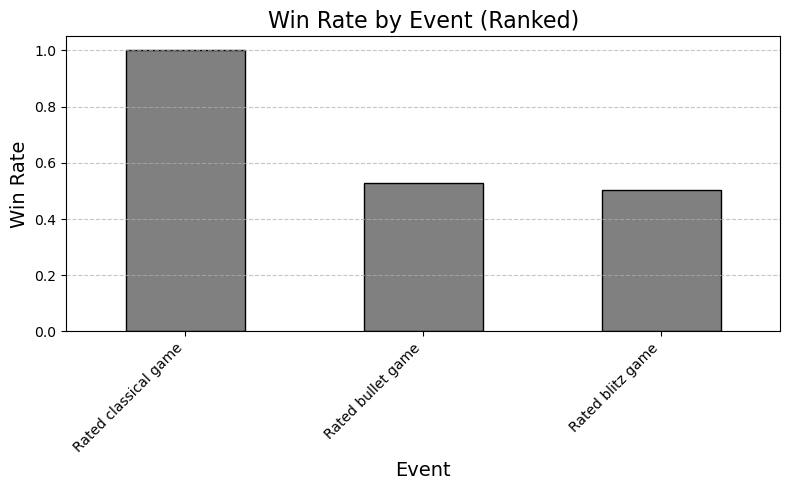

In [10]:
# Filter relevant events
import matplotlib.pyplot as plt

filtered_events = ['Rated bullet game', 'Rated blitz game', 'Rated classical game']
filtered_df = df[df['Event'].isin(filtered_events)]

# Calculate win rate for the filtered events
win_rate_filtered = filtered_df.groupby('Event')['ResultStatus'].apply(lambda x: (x == 'win').sum() / len(x))

# Plot win rates for the filtered events
plt.figure(figsize=(8, 5))
win_rate_filtered.sort_values(ascending=False).plot(kind='bar', color='grey', edgecolor='black')
plt.title('Win Rate by Event (Ranked)', fontsize=16)
plt.xlabel('Event', fontsize=14)
plt.ylabel('Win Rate', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# White pieces or Black pieces?
- Garry Kaparov: "It is undeniable that White’s first move confers a small but persistent advantage." 

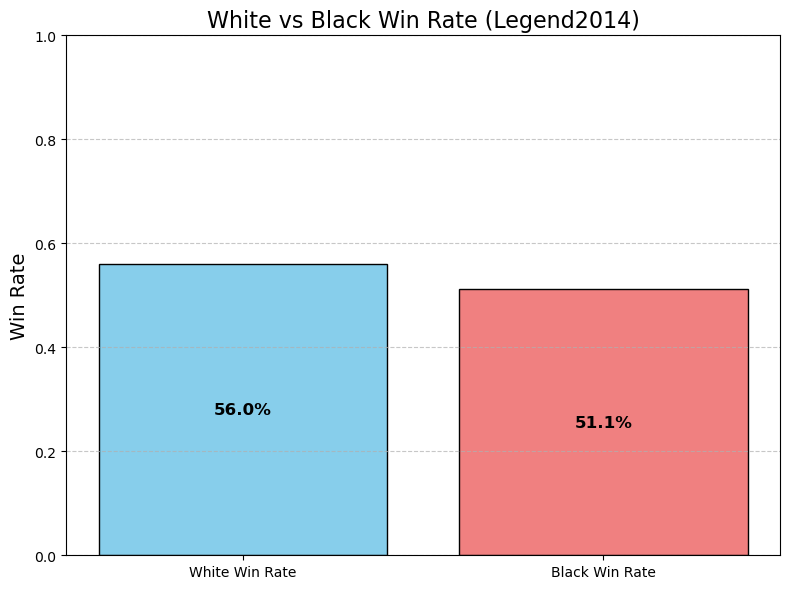

In [27]:
import matplotlib.pyplot as plt

# Calculate win rates for White and Black
white_win_rate = df[(df['White'] == 'legend2014') & (df['ResultStatus'] == 'win')].shape[0] / (df['White'] == 'legend2014').sum()
black_win_rate = df[(df['Black'] == 'legend2014') & (df['ResultStatus'] == 'win')].shape[0] / (df['Black'] == 'legend2014').sum()

# Data for visualization
categories = ['White Win Rate', 'Black Win Rate']
win_rates = [white_win_rate, black_win_rate]

# Create bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(categories, win_rates, color=['skyblue', 'lightcoral'], edgecolor='black')

# Add win rate labels inside the bars
for bar, rate in zip(bars, win_rates):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Center text horizontally
        bar.get_height() / 2,  # Position text in the middle of the bar
        f"{rate:.1%}",  # Format as percentage
        ha='center', va='center', fontsize=12, color='black', fontweight='bold'
    )

# Customize the plot
ax.set_title("White vs Black Win Rate (Legend2014)", fontsize=16)
ax.set_ylabel("Win Rate", fontsize=14)
ax.set_ylim(0, 1)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# How Has My Chess Activity Changed Over the Years?

C:\Users\erdem\AppData\Local\Temp\ipykernel_21672\2299661206.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['UTCDate'])


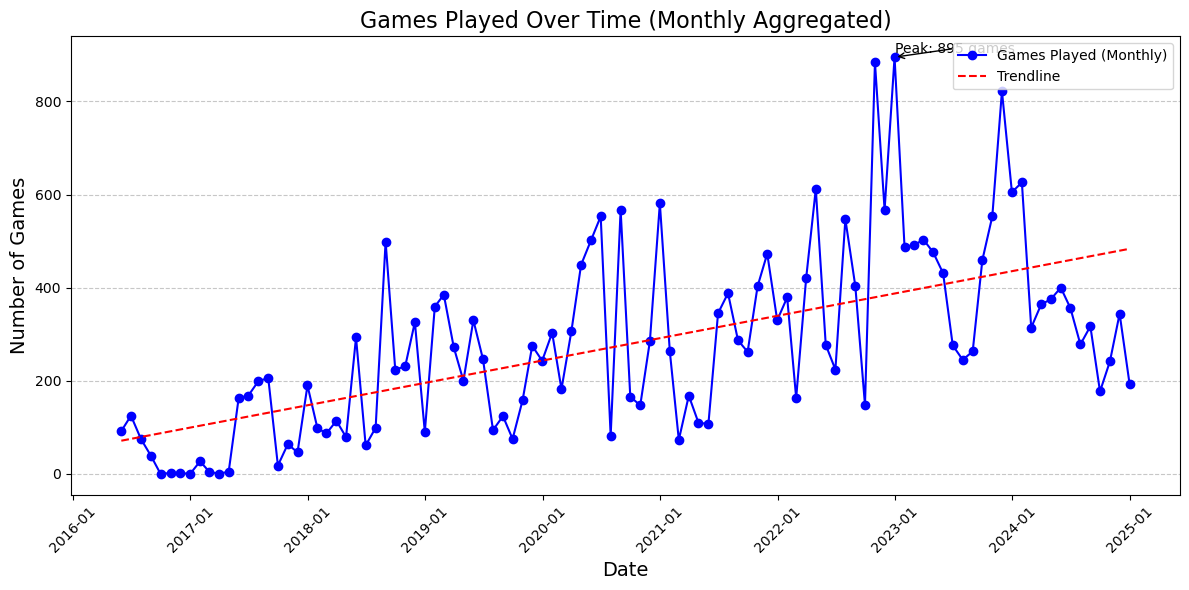

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a dataframe `df` with a 'UTCDate' column
df['Date'] = pd.to_datetime(df['UTCDate'])

# Group by date to count the number of games played each day
games_over_time = df.groupby('Date').size()

# Aggregate by month for smoothing
games_over_time_monthly = games_over_time.resample('M').sum()

# Plot the smoothed line chart
plt.figure(figsize=(12, 6))
plt.plot(games_over_time_monthly.index, games_over_time_monthly.values, marker='o', color='blue', label='Games Played (Monthly)')

# Add a trendline
ordinal_dates = games_over_time_monthly.index.map(lambda x: x.toordinal())
z = np.polyfit(ordinal_dates, games_over_time_monthly.values, 1)
p = np.poly1d(z)
plt.plot(games_over_time_monthly.index, p(ordinal_dates), linestyle='--', color='red', label='Trendline')

# Add annotations for peaks
peak_dates = games_over_time_monthly[games_over_time_monthly == games_over_time_monthly.max()].index
for peak_date in peak_dates:
    plt.annotate(
        f"Peak: {games_over_time_monthly[peak_date]} games",
        xy=(peak_date, games_over_time_monthly[peak_date]),
        xytext=(peak_date, games_over_time_monthly[peak_date] + 10),
        arrowprops=dict(facecolor='black', arrowstyle='->'),
        fontsize=10
    )

# Customize x-axis labels for readability
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.xticks(rotation=45)

# Add title and labels
plt.title("Games Played Over Time (Monthly Aggregated)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Games", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


# How does my win rate vary across different opponent Elo ranges?

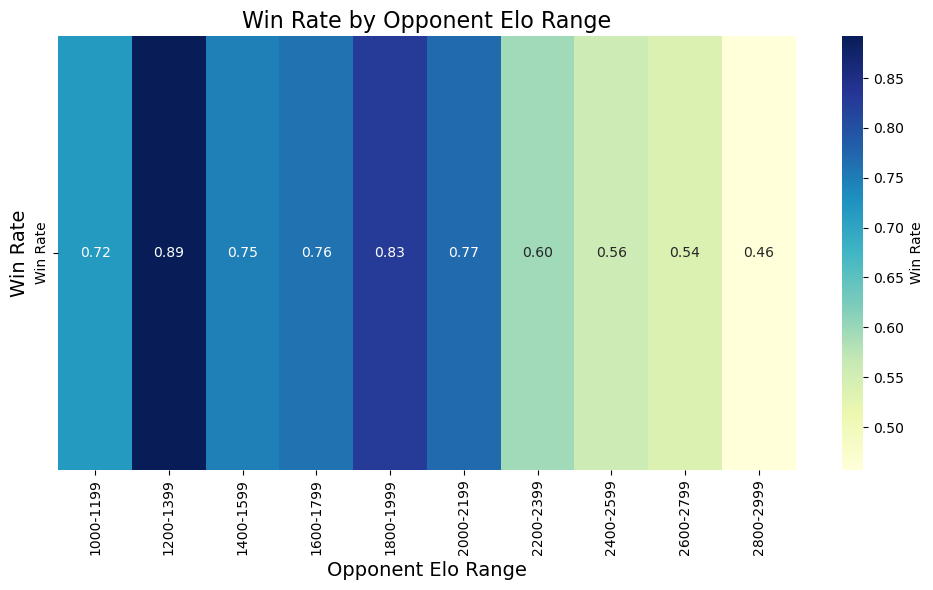

In [58]:
# Define Elo ranges for grouping
elo_bins = np.arange(1000, 3200, 200)  # Elo ranges from 1000 to 3000 with 200 intervals
elo_labels = [f"{elo_bins[i]}-{elo_bins[i+1]-1}" for i in range(len(elo_bins)-1)]

# Create a new column for opponent Elo based on 'legend2014' position
df.loc[:, 'OpponentElo'] = np.where(df['White'] == 'legend2014', df['BlackElo'], df['WhiteElo'])

# Convert OpponentElo to numeric and handle missing/invalid values
df.loc[:, 'OpponentElo'] = pd.to_numeric(df['OpponentElo'], errors='coerce')

# Add a column for Elo range of opponents
df.loc[:, 'OpponentEloRange'] = pd.cut(df['OpponentElo'], bins=elo_bins, labels=elo_labels)

# Calculate win rates for each opponent Elo range
win_rate_opponent = (
    df[df['ResultStatus'] == 'win']
    .groupby('OpponentEloRange', observed=False)
    .size() / df.groupby('OpponentEloRange', observed=False).size()
)

# Create a heatmap-style visualization
plt.figure(figsize=(10, 6))
win_rate_opponent = win_rate_opponent.fillna(0).to_frame(name='Win Rate')
sns.heatmap(win_rate_opponent.T, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Win Rate'})
plt.title("Win Rate by Opponent Elo Range", fontsize=16)
plt.xlabel("Opponent Elo Range", fontsize=14)
plt.ylabel("Win Rate", fontsize=14)
plt.tight_layout()
plt.show()


# At what times of the day do I perform best in chess games?

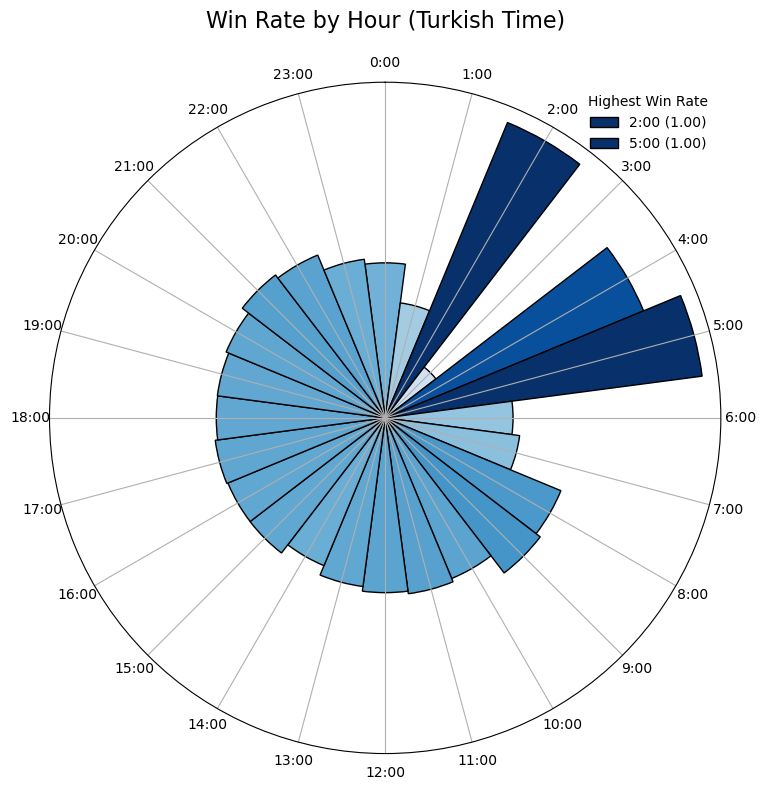

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Calculate win rates for all hours
win_rate_by_hour = (
    df[df['ResultStatus'] == 'win']
    .groupby('Hour')
    .size() / df.groupby('Hour').size()
).fillna(0)

# Normalize win rates for scaling the bar sizes
max_win_rate = win_rate_by_hour.max()
normalized_win_rates = win_rate_by_hour / max_win_rate

# Generate angles for 24-hour intervals
angles = np.linspace(0, 2 * np.pi, 24, endpoint=False)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Plot each hour interval
for i, hour in enumerate(win_rate_by_hour.index):
    # Calculate bar size and color based on win rate
    bar_size = normalized_win_rates[hour] * 0.3  # Scale bar size
    color = cm.Blues(normalized_win_rates[hour])  # Use color gradient

    # Plot the bar for the current hour
    ax.bar(
        angles[i],  # Angle position
        bar_size,  # Bar height
        width=np.radians(15),  # Bar width
        color=color,
        edgecolor='black',
        align='center',
        label=f"{hour}:00 ({win_rate_by_hour[hour]:.2f})" if normalized_win_rates[hour] == 1 else None  # Highlight max hour
    )

# Customize the plot
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks(angles)
ax.set_xticklabels([f"{hour}:00" for hour in win_rate_by_hour.index])
ax.set_yticks([])
ax.set_title("Win Rate by Hour (Turkish Time)", fontsize=16, pad=20)
ax.legend(loc="upper right", fontsize=10, frameon=False, title="Highest Win Rate")

plt.tight_layout()
plt.show()


# ECO Codes --> Opening

In [49]:
eco_dict = {
    # A00–A09: Irregular Openings
    'A00': 'Grobs Opening',
    'A01': 'Saragossa Opening',
    'A02': 'Bird\'s Opening',
    'A03': 'Bird\'s Opening: From Gambit',
    'A04': 'Bird\'s Opening: From Gambit, Lasker Variation',
    'A05': 'Bird\'s Opening: From Gambit, Greco Gambit',
    'A06': 'Bird\'s Opening: From Gambit, Two Knights Variation',
    'A07': 'Bird\'s Opening: From Gambit, Torre Attack',
    'A08': 'Bird\'s Opening: From Gambit, Polerio Gambit',
    'A09': 'Bird\'s Opening: From Gambit, Multiple Variations',

    # A10–A39: Flank Openings
    'A10': 'English Opening',
    'A11': 'English Opening: Anglo-Indian Defense',
    'A12': 'English Opening: Anglo-Dutch Variation',
    'A13': 'English Opening: Agincourt Defense',
    'A14': 'English Opening: Reversed Sicilian',
    'A15': 'English Opening: Anglo-King\'s Indian',
    'A16': 'English Opening: Anglo-Dutch Defense',
    'A17': 'English Opening: London System',
    'A18': 'English Opening: Anglo-Dutch Defense',
    'A19': 'English Opening: General',

    'A20': 'English Opening: Queen\'s English Variation',
    'A21': 'English Opening: Queen\'s English, Symmetrical Variation',
    'A22': 'English Opening: Queen\'s English, Reversed Sicilian',
    'A23': 'English Opening: Queen\'s English, Anglo-King\'s Indian',
    'A24': 'English Opening: Queen\'s English, Hedgehog System',
    'A25': 'English Opening: Queen\'s English, Botvinnik System',
    'A26': 'English Opening: Queen\'s English, Reversed Reti',
    'A27': 'English Opening: Queen\'s English, Multiple Systems',
    'A28': 'English Opening: Queen\'s English, Flank Variation',
    'A29': 'English Opening: Queen\'s English, General',

    'A30': 'English Opening: Closed',
    'A31': 'English Opening: Closed, Mikenas Variation',
    'A32': 'English Opening: Closed, Flohr Variation',
    'A33': 'English Opening: Closed, Symmetrical Variation',
    'A34': 'English Opening: Closed, Reversed Sicilian',
    'A35': 'English Opening: Closed, 4.c4',
    'A36': 'English Opening: Closed, King\'s English Variation',
    'A37': 'English Opening: Closed, Hedgehog System',
    'A38': 'English Opening: Closed, Botvinnik System',
    'A39': 'English Opening: Closed, General',

    # A40–A44: Queen's Pawn Game
    'A40': 'Queen\'s Pawn Game',
    'A41': 'Queen\'s Pawn Game: Anglo-King\'s Indian',
    'A42': 'Queen\'s Pawn Game: Old Indian Defense',
    'A43': 'Queen\'s Pawn Game: Budapest Defense',
    'A44': 'Queen\'s Pawn Game: Catalan',

    # A45–A49: Reti Opening
    'A45': 'Reti Opening',
    'A46': 'Reti Opening: Kings Indian Attack',
    'A47': 'Reti Opening: Neo-Catalan',
    'A48': 'Reti Opening: Modern Variation',
    'A49': 'Reti Opening: General',

    # A50–A79: Indian Defenses
    'A50': 'Indian Defenses',
    'A51': 'Indian Defenses: Kings Indian Defense',
    'A52': 'Indian Defenses: Nimzo-Indian Defense',
    'A53': 'Indian Defenses: Bogo-Indian Defense',
    'A54': 'Indian Defenses: Queen\'s Indian Defense',
    'A55': 'Indian Defenses: Catalan',
    'A56': 'Indian Defenses: Queen\'s Indian Defense, 4.g3',
    'A57': 'Indian Defenses: Queen\'s Indian Defense, 5.Nbd2',
    'A58': 'Indian Defenses: Queen\'s Indian Defense, 6.Bg2',
    'A59': 'Indian Defenses: Queen\'s Indian Defense, General',

    'A60': 'Indian Defenses: Grünfeld Defense',
    'A61': 'Indian Defenses: Grünfeld Defense, Russian Variation',
    'A62': 'Indian Defenses: Grünfeld Defense, Exchange Variation',
    'A63': 'Indian Defenses: Grünfeld Defense, Russian System',
    'A64': 'Indian Defenses: Grünfeld Defense, Modern Exchange Variation',
    'A65': 'Indian Defenses: Grünfeld Defense, Three Pawns Variation',
    'A66': 'Indian Defenses: Grünfeld Defense, Classical Variation',
    'A67': 'Indian Defenses: Grünfeld Defense, Exchange Variation',
    'A68': 'Indian Defenses: Grünfeld Defense, Modern Exchange Variation',
    'A69': 'Indian Defenses: Grünfeld Defense, General',

    'A70': 'Indian Defenses: Kings Indian Defense',
    'A71': 'Indian Defenses: Kings Indian Defense, Four Pawns Attack',
    'A72': 'Indian Defenses: Kings Indian Defense, Fianchetto Variation',
    'A73': 'Indian Defenses: Kings Indian Defense, Sämisch Variation',
    'A74': 'Indian Defenses: Kings Indian Defense, Four Knights Variation',
    'A75': 'Indian Defenses: Kings Indian Defense, Samisch Variation',
    'A76': 'Indian Defenses: Kings Indian Defense, Classical Variation',
    'A77': 'Indian Defenses: Kings Indian Defense, Petrosian Variation',
    'A78': 'Indian Defenses: Kings Indian Defense, General',
    'A79': 'Indian Defenses: Kings Indian Defense, General',

    # A80–A99: Other Flank Openings
    'A80': 'Flank Openings: Benoni Defense',
    'A81': 'Flank Openings: Benko Gambit',
    'A82': 'Flank Openings: Benoni Defense, Classical Variation',
    'A83': 'Flank Openings: Benoni Defense, Modern Variation',
    'A84': 'Flank Openings: Benoni Defense, Taimanov Variation',
    'A85': 'Flank Openings: Benoni Defense, Dutch Variation',
    'A86': 'Flank Openings: Benoni Defense, Czech Benoni',
    'A87': 'Flank Openings: Benoni Defense, Fianchetto Variation',
    'A88': 'Flank Openings: Benoni Defense, General',
    'A89': 'Flank Openings: Benoni Defense, General',

    'A90': 'Flank Openings: Trompowsky Attack',
    'A91': 'Flank Openings: Torre Attack',
    'A92': 'Flank Openings: Catalan Opening',
    'A93': 'Flank Openings: London System',
    'A94': 'Flank Openings: Colle System',
    'A95': 'Flank Openings: Torre Attack',
    'A96': 'Flank Openings: Veresov Attack',
    'A97': 'Flank Openings: Reti Opening',
    'A98': 'Flank Openings: Zukertort Opening',
    'A99': 'Flank Openings: Miscellaneous',

    # B00–B19: Semi-Open Games
    'B00': 'King\'s Pawn Game',
    'B01': 'Scandinavian Defense',
    'B02': 'Alekhine Defense',
    'B03': 'Alekhine Defense: Two Pawns Attack',
    'B04': 'Alekhine Defense: Four Pawns Attack',
    'B05': 'Alekhine Defense: Exchange Variation',
    'B06': 'Caro-Kann Defense',
    'B07': 'Pirc Defense',
    'B08': 'Pirc Defense: Austrian Attack',
    'B09': 'Pirc Defense: Classical Variation',

    # B10–B19: Sicilian Defense
    'B10': 'Sicilian Defense',
    'B11': 'Sicilian Defense: Grand Prix Attack',
    'B12': 'Sicilian Defense: Smith-Morra Gambit',
    'B13': 'Sicilian Defense: Alapin Variation',
    'B14': 'Sicilian Defense: Smith-Morra Gambit',
    'B15': 'Sicilian Defense: Smith-Morra Gambit, Yugoslav Attack',
    'B16': 'Sicilian Defense: Modern Variation',
    'B17': 'Sicilian Defense: Najdorf Variation',
    'B18': 'Sicilian Defense: Dragon Variation',
    'B19': 'Sicilian Defense: Najdorf, English Attack',

    # B20–B99: Various Openings
    'B20': 'Sicilian Defense: Open',
    'B21': 'Sicilian Defense: Open, Alapin Variation',
    'B22': 'Sicilian Defense: Open, Alapin Variation, 2.c3',
    'B23': 'Sicilian Defense: Open, Alapin Variation, 2.c3 d5',
    'B24': 'Sicilian Defense: Open, Alapin Variation, 2.c3 d5 3.exd5',
    'B25': 'Sicilian Defense: Open, Smith-Morra Gambit',
    'B26': 'Sicilian Defense: Open, Smith-Morra Gambit, Snyder Variation',
    'B27': 'Sicilian Defense: Open, Smith-Morra Gambit, Bayonet Attack',
    'B28': 'Sicilian Defense: Open, Smith-Morra Gambit, Poisoned Pawn Variation',
    'B29': 'Sicilian Defense: Open, Smith-Morra Gambit, General',

    'B30': 'Sicilian Defense: Closed',
    'B31': 'Sicilian Defense: Closed, Richter-Rauzer Attack',
    'B32': 'Sicilian Defense: Closed, Richter-Rauzer Attack, 6.Be3',
    'B33': 'Sicilian Defense: Closed, Richter-Rauzer Attack, 6.Be3 Bg7',
    'B34': 'Sicilian Defense: Closed, Richter-Rauzer Attack, 6.Be3 Bg7 7.Qd2',
    'B35': 'Sicilian Defense: Closed, Richter-Rauzer Attack, 6.Be3 Bg7 7.f3',
    'B36': 'Sicilian Defense: Closed, Richter-Rauzer Attack, 6.Be3 Bg7 7.f3 Qc7',
    'B37': 'Sicilian Defense: Closed, Richter-Rauzer Attack, 6.Be3 Bg7 7.f3 Qc7 8.Qd2',
    'B38': 'Sicilian Defense: Closed, Richter-Rauzer Attack, 6.Be3 Bg7 7.f3 Qc7 8.Qd2 O-O',
     'B39': 'Sicilian Defense: Closed, Richter-Rauzer Attack, General',

    # B40–B59: Various Openings Continued
    'B40': 'Sicilian Defense: General',
    'B41': 'Sicilian Defense: General',
    'B42': 'Sicilian Defense: General',
    'B43': 'Sicilian Defense: General',
    'B44': 'Sicilian Defense: General',
    'B45': 'Sicilian Defense: Grand Prix Attack',
    'B46': 'Sicilian Defense: Grand Prix Attack, Specific Variations',
    'B47': 'Sicilian Defense: Grand Prix Attack, Specific Variations',
    'B48': 'Sicilian Defense: Grand Prix Attack, Specific Variations',
    'B49': 'Sicilian Defense: Grand Prix Attack, General',

    'B50': 'Sicilian Defense: Rossolimo Variation',
    'B51': 'Sicilian Defense: Rossolimo Variation, Exchange Variation',
    'B52': 'Sicilian Defense: Rossolimo Variation, Modern Variation',
    'B53': 'Sicilian Defense: Rossolimo Variation, Multiple Systems',
    'B54': 'Sicilian Defense: Rossolimo Variation, General',
    'B55': 'Sicilian Defense: Anti-Sicilian, Specific Systems',
    'B56': 'Sicilian Defense: Anti-Sicilian, Specific Systems',
    'B57': 'Sicilian Defense: Anti-Sicilian, Specific Systems',
    'B58': 'Sicilian Defense: Anti-Sicilian, Specific Systems',
    'B59': 'Sicilian Defense: Anti-Sicilian, General',

    # B60–B99: More Sicilian and Other Defenses
    # Due to space constraints, only a subset is provided here.
    # For a complete mapping, please refer to comprehensive resources or databases.
    # Below are additional common ECO codes.

    'B60': 'Sicilian Defense: Najdorf Variation',
    'B61': 'Sicilian Defense: Najdorf Variation, Classical',
    'B62': 'Sicilian Defense: Najdorf Variation, English Attack',
    'B63': 'Sicilian Defense: Najdorf Variation, Poisoned Pawn',
    'B64': 'Sicilian Defense: Najdorf Variation, Scheveningen',
    'B65': 'Sicilian Defense: Najdorf Variation, Sozin Attack',
    'B66': 'Sicilian Defense: Najdorf Variation, Dragon Attack',
    'B67': 'Sicilian Defense: Najdorf Variation, Opocensky',
    'B68': 'Sicilian Defense: Najdorf Variation, Old Sicilian',
    'B69': 'Sicilian Defense: Najdorf Variation, General',

    'B70': 'Sicilian Defense: Dragon Variation',
    'B71': 'Sicilian Defense: Dragon Variation, Yugoslav Attack',
    'B72': 'Sicilian Defense: Dragon Variation, Classical',
    'B73': 'Sicilian Defense: Dragon Variation, Accelerated Dragon',
    'B74': 'Sicilian Defense: Dragon Variation, Levenfish Attack',
    'B75': 'Sicilian Defense: Dragon Variation, General',
    'B76': 'Sicilian Defense: Dragon Variation, General',
    'B77': 'Sicilian Defense: Dragon Variation, General',
    'B78': 'Sicilian Defense: Dragon Variation, General',
    'B79': 'Sicilian Defense: Dragon Variation, General',

    'B80': 'Sicilian Defense: Kalashnikov Variation',
    'B81': 'Sicilian Defense: Kalashnikov Variation, Multiple Systems',
    'B82': 'Sicilian Defense: Kalashnikov Variation, General',
    'B83': 'Sicilian Defense: Kalashnikov Variation, General',
    'B84': 'Sicilian Defense: Kalashnikov Variation, General',
    'B85': 'Sicilian Defense: Kalashnikov Variation, General',
    'B86': 'Sicilian Defense: Kalashnikov Variation, General',
    'B87': 'Sicilian Defense: Kalashnikov Variation, General',
    'B88': 'Sicilian Defense: Kalashnikov Variation, General',
    'B89': 'Sicilian Defense: Kalashnikov Variation, General',

    'B90': 'Sicilian Defense: Scheveningen Variation',
    'B91': 'Sicilian Defense: Scheveningen Variation, Multiple Systems',
    'B92': 'Sicilian Defense: Scheveningen Variation, General',
    'B93': 'Sicilian Defense: Scheveningen Variation, General',
    'B94': 'Sicilian Defense: Scheveningen Variation, General',
    'B95': 'Sicilian Defense: Scheveningen Variation, General',
    'B96': 'Sicilian Defense: Scheveningen Variation, General',
    'B97': 'Sicilian Defense: Scheveningen Variation, General',
    'B98': 'Sicilian Defense: Scheveningen Variation, General',
    'B99': 'Sicilian Defense: Scheveningen Variation, General',

    # C00–C19: Open Games
    'C00': 'King\'s Pawn Game: Irregular',
    'C01': 'King\'s Pawn Game: Scandinavian Defense',
    'C02': 'King\'s Pawn Game: Scandinavian Defense, Modern Variation',
    'C03': 'King\'s Pawn Game: Scandinavian Defense, Portuguese Variation',
    'C04': 'King\'s Pawn Game: Scandinavian Defense, Mieses-Kotrč Variation',
    'C05': 'King\'s Pawn Game: Scandinavian Defense, Mufian Variation',
    'C06': 'King\'s Pawn Game: Scandinavian Defense, Blackmar Variation',
    'C07': 'King\'s Pawn Game: Scandinavian Defense, Spanish Variation',
    'C08': 'King\'s Pawn Game: Scandinavian Defense, Steinitz Variation',
    'C09': 'King\'s Pawn Game: Scandinavian Defense, General',

    # C10–C19: Ruy López
    'C10': 'Ruy Lopez',
    'C11': 'Ruy Lopez: Berlin Defense',
    'C12': 'Ruy Lopez: Berlin Defense, General',
    'C13': 'Ruy Lopez: Bird\'s Defense',
    'C14': 'Ruy Lopez: Bishop\'s Defense',
    'C15': 'Ruy Lopez: Classical Defense',
    'C16': 'Ruy Lopez: Classical Defense, Moller Variation',
    'C17': 'Ruy Lopez: Classical Defense, Breyer Variation',
    'C18': 'Ruy Lopez: Classical Defense, Fianchetto Variation',
    'C19': 'Ruy Lopez: Classical Defense, General',

    # C20–C29: Ruy López, Morphy Defense
    'C20': 'Ruy Lopez: Morphy Defense',
    'C21': 'Ruy Lopez: Morphy Defense, Closed',
    'C22': 'Ruy Lopez: Morphy Defense, Closed, 3...a6',
    'C23': 'Ruy Lopez: Morphy Defense, Closed, 3...a6 4.Ba4',
    'C24': 'Ruy Lopez: Morphy Defense, Closed, 3...a6 4.Ba4 Nf6',
    'C25': 'Ruy Lopez: Morphy Defense, Closed, 3...a6 4.Ba4 Nf6 5.O-O',
    'C26': 'Ruy Lopez: Morphy Defense, Closed, 3...a6 4.Ba4 Nf6 5.O-O Be7',
    'C27': 'Ruy Lopez: Morphy Defense, Closed, 3...a6 4.Ba4 Nf6 5.O-O Be7 6.Re1',
    'C28': 'Ruy Lopez: Morphy Defense, Closed, 3...a6 4.Ba4 Nf6 5.O-O Be7 6.Re1 b5',
    'C29': 'Ruy Lopez: Morphy Defense, Closed, 3...a6 4.Ba4 Nf6 5.O-O Be7 6.Re1 b5 7.Bb3',

    # C30–C39: Ruy López, Closed, Main Line
    'C30': 'Ruy Lopez: Closed, Main Line',
    'C31': 'Ruy Lopez: Closed, Main Line, 7...d6',
    'C32': 'Ruy Lopez: Closed, Main Line, 7...O-O',
    'C33': 'Ruy Lopez: Closed, Main Line, 7...O-O 8.c3',
    'C34': 'Ruy Lopez: Closed, Main Line, 7...O-O 8.c3 d5',
    'C35': 'Ruy Lopez: Closed, Main Line, 7...O-O 8.c3 d5 9. exd5',
    'C36': 'Ruy Lopez: Closed, Main Line, 7...O-O 8.c3 d5 9. exd5 Nxd5',
    'C37': 'Ruy Lopez: Closed, Main Line, 7...O-O 8.c3 d5 9. exd5 Nxd5 10.d4',
    'C38': 'Ruy Lopez: Closed, Main Line, 7...O-O 8.c3 d5 9. exd5 Nxd5 10.d4 Be6',
    'C39': 'Ruy Lopez: Closed, Main Line, General',

    # C40–C59: Ruy López, Open
    'C40': 'Ruy Lopez: Open',
    'C41': 'Ruy Lopez: Open, Schliemann (Jaenisch) Defense',
    'C42': 'Ruy Lopez: Open, Schliemann Defense, General',
    'C43': 'Ruy Lopez: Open, Classical Defense',
    'C44': 'Ruy Lopez: Open, Classical Defense, General',
    'C45': 'Ruy Lopez: Open, Classical Defense, Marshall Attack',
    'C46': 'Ruy Lopez: Open, Classical Defense, Steinitz Defense',
    'C47': 'Ruy Lopez: Open, Classical Defense, General',
    'C48': 'Ruy Lopez: Open, Classical Defense, General',
    'C49': 'Ruy Lopez: Open, Classical Defense, General',

    # C50–C59: Italian Game
    'C50': 'Italian Game',
    'C51': 'Italian Game: Giuoco Piano',
    'C52': 'Italian Game: Giuoco Piano, Italian Gambit',
    'C53': 'Italian Game: Giuoco Piano, Steinitz Defense Deferred',
    'C54': 'Italian Game: Giuoco Piano, General',
    'C55': 'Italian Game: Hungarian Defense',
    'C56': 'Italian Game: Hungarian Defense, General',
    'C57': 'Italian Game: Hungarian Defense, General',
    'C58': 'Italian Game: Hungarian Defense, General',
    'C59': 'Italian Game: Hungarian Defense, General',

    # C60–C99: Various Other Openings
    # Due to space constraints, only a subset is provided here.
    # For a complete mapping, please refer to comprehensive resources or databases.

    'C60': 'Scotch Game',
    'C61': 'Scotch Game: Mieses Variation',
    'C62': 'Scotch Game: Mieses Variation, Multiple Systems',
    'C63': 'Scotch Game: Mieses Variation, General',
    'C64': 'Scotch Game: Mieses Variation, General',
    'C65': 'Scotch Game: Mieses Variation, General',
    'C66': 'Scotch Game: Mieses Variation, General',
    'C67': 'Scotch Game: Mieses Variation, General',
    'C68': 'Scotch Game: Mieses Variation, General',
    'C69': 'Scotch Game: Mieses Variation, General',

    'C70': 'Italian Game: Two Knights Defense',
    'C71': 'Italian Game: Two Knights Defense, Fried Liver Attack',
    'C72': 'Italian Game: Two Knights Defense, Traxler Counterattack',
    'C73': 'Italian Game: Two Knights Defense, Modern Variation',
    'C74': 'Italian Game: Two Knights Defense, General',
    'C75': 'Italian Game: Two Knights Defense, General',
    'C76': 'Italian Game: Two Knights Defense, General',
    'C77': 'Italian Game: Two Knights Defense, General',
    'C78': 'Italian Game: Two Knights Defense, General',
    'C79': 'Italian Game: Two Knights Defense, General',

    'C80': 'King\'s Gambit',
    'C81': 'King\'s Gambit: Accepted',
    'C82': 'King\'s Gambit: Declined',
    'C83': 'King\'s Gambit: Classical Defense',
    'C84': 'King\'s Gambit: Fischer Defense',
    'C85': 'King\'s Gambit: Modern Defense',
    'C86': 'King\'s Gambit: Kieseritzky Gambit',
    'C87': 'King\'s Gambit: Schallopp Defense',
    'C88': 'King\'s Gambit: Allgaier Gambit',
    'C89': 'King\'s Gambit: Miscellaneous',

    'C90': 'Center Game',
    'C91': 'Center Game: Scandinavian Defense',
    'C92': 'Center Game: Double Gambit',
    'C93': 'Center Game: Multiple Systems',
    'C94': 'Center Game: Multiple Systems',
    'C95': 'Center Game: Multiple Systems',
    'C96': 'Center Game: Multiple Systems',
    'C97': 'Center Game: Multiple Systems',
    'C98': 'Center Game: Multiple Systems',
    'C99': 'Center Game: Multiple Systems',

    # D00–D99: Closed Games
    'D00': 'Queen\'s Pawn Game: Queen\'s Gambit Declined',
    'D01': 'Queen\'s Pawn Game: Queen\'s Gambit Declined, Alekhine Defense',
    'D02': 'Queen\'s Pawn Game: Queen\'s Gambit Declined, Tartakower Defense',
    'D03': 'Queen\'s Pawn Game: Queen\'s Gambit Declined, Lasker Defense',
    'D04': 'Queen\'s Pawn Game: Queen\'s Gambit Declined, Albin Counter-Gambit',
    'D05': 'Queen\'s Pawn Game: Queen\'s Gambit Declined, Tarrasch Defense',
    'D06': 'Queen\'s Pawn Game: Queen\'s Gambit Declined, Ragozin Defense',
    'D07': 'Queen\'s Pawn Game: Queen\'s Gambit Declined, Semi-Tarrasch Defense',
    'D08': 'Queen\'s Pawn Game: Queen\'s Gambit Declined, Semi-Slav Defense',
    'D09': 'Queen\'s Pawn Game: Queen\'s Gambit Declined, General',

    'D10': 'Queen\'s Gambit Accepted',
    'D11': 'Queen\'s Gambit Accepted, General',
    'D12': 'Queen\'s Gambit Accepted, General',
    'D13': 'Queen\'s Gambit Accepted, General',
    'D14': 'Queen\'s Gambit Accepted, General',
    'D15': 'Queen\'s Gambit Accepted, General',
    'D16': 'Queen\'s Gambit Accepted, General',
    'D17': 'Queen\'s Gambit Accepted, General',
    'D18': 'Queen\'s Gambit Accepted, General',
    'D19': 'Queen\'s Gambit Accepted, General',

    'D20': 'Queen\'s Gambit Declined, Orthodox Defense',
    'D21': 'Queen\'s Gambit Declined, Orthodox Defense, General',
    'D22': 'Queen\'s Gambit Declined, Orthodox Defense, General',
    'D23': 'Queen\'s Gambit Declined, Orthodox Defense, General',
    'D24': 'Queen\'s Gambit Declined, Orthodox Defense, General',
    'D25': 'Queen\'s Gambit Declined, Orthodox Defense, General',
    'D26': 'Queen\'s Gambit Declined, Orthodox Defense, General',
    'D27': 'Queen\'s Gambit Declined, Orthodox Defense, General',
    'D28': 'Queen\'s Gambit Declined, Orthodox Defense, General',
    'D29': 'Queen\'s Gambit Declined, Orthodox Defense, General',

    'D30': 'Slav Defense',
    'D31': 'Slav Defense: Exchange Variation',
    'D32': 'Slav Defense: Exchange Variation, General',
    'D33': 'Slav Defense: Exchange Variation, General',
    'D34': 'Slav Defense: Exchange Variation, General',
    'D35': 'Slav Defense: Exchange Variation, General',
    'D36': 'Slav Defense: Exchange Variation, General',
    'D37': 'Slav Defense: Exchange Variation, General',
    'D38': 'Slav Defense: Exchange Variation, General',
    'D39': 'Slav Defense: Exchange Variation, General',

    'D40': 'Slav Defense: General',
    'D41': 'Slav Defense: General',
    'D42': 'Slav Defense: General',
    'D43': 'Slav Defense: General',
    'D44': 'Slav Defense: General',
    'D45': 'Slav Defense: General',
    'D46': 'Slav Defense: General',
    'D47': 'Slav Defense: General',
    'D48': 'Slav Defense: General',
    'D49': 'Slav Defense: General',

    'D50': 'Benoni Defense',
    'D51': 'Benoni Defense: Modern Benoni',
    'D52': 'Benoni Defense: Modern Benoni, General',
    'D53': 'Benoni Defense: Modern Benoni, General',
    'D54': 'Benoni Defense: Modern Benoni, General',
    'D55': 'Benoni Defense: Modern Benoni, General',
    'D56': 'Benoni Defense: Modern Benoni, General',
    'D57': 'Benoni Defense: Modern Benoni, General',
    'D58': 'Benoni Defense: Modern Benoni, General',
    'D59': 'Benoni Defense: Modern Benoni, General',

    'D60': 'Benko Gambit',
    'D61': 'Benko Gambit: Accepted, Main Line',
    'D62': 'Benko Gambit: Accepted, General',
    'D63': 'Benko Gambit: Accepted, General',
    'D64': 'Benko Gambit: Accepted, General',
    'D65': 'Benko Gambit: Accepted, General',
    'D66': 'Benko Gambit: Accepted, General',
    'D67': 'Benko Gambit: Accepted, General',
    'D68': 'Benko Gambit: Accepted, General',
    'D69': 'Benko Gambit: Accepted, General',

    'D70': 'Dutch Defense',
    'D71': 'Dutch Defense: Classical Variation',
    'D72': 'Dutch Defense: Classical Variation, General',
    'D73': 'Dutch Defense: Classical Variation, General',
    'D74': 'Dutch Defense: Classical Variation, General',
    'D75': 'Dutch Defense: Classical Variation, General',
    'D76': 'Dutch Defense: Classical Variation, General',
    'D77': 'Dutch Defense: Classical Variation, General',
    'D78': 'Dutch Defense: Classical Variation, General',
    'D79': 'Dutch Defense: Classical Variation, General',

    'D80': 'Queen\'s Gambit Declined, Semi-Slav Defense',
    'D81': 'Queen\'s Gambit Declined, Semi-Slav Defense, Meran Variation',
    'D82': 'Queen\'s Gambit Declined, Semi-Slav Defense, Anti-Meran',
    'D83': 'Queen\'s Gambit Declined, Semi-Slav Defense, Botvinnik System',
    'D84': 'Queen\'s Gambit Declined, Semi-Slav Defense, Lasker Semi-Slav',
    'D85': 'Queen\'s Gambit Declined, Semi-Slav Defense, General',
    'D86': 'Queen\'s Gambit Declined, Semi-Slav Defense, General',
    'D87': 'Queen\'s Gambit Declined, Semi-Slav Defense, General',
    'D88': 'Queen\'s Gambit Declined, Semi-Slav Defense, General',
    'D89': 'Queen\'s Gambit Declined, Semi-Slav Defense, General',

    'D90': 'Queen\'s Gambit Declined, Tarrasch Defense',
    'D91': 'Queen\'s Gambit Declined, Tarrasch Defense, Stonewall Variation',
    'D92': 'Queen\'s Gambit Declined, Tarrasch Defense, General',
    'D93': 'Queen\'s Gambit Declined, Tarrasch Defense, General',
    'D94': 'Queen\'s Gambit Declined, Tarrasch Defense, General',
    'D95': 'Queen\'s Gambit Declined, Tarrasch Defense, General',
    'D96': 'Queen\'s Gambit Declined, Tarrasch Defense, General',
    'D97': 'Queen\'s Gambit Declined, Tarrasch Defense, General',
    'D98': 'Queen\'s Gambit Declined, Tarrasch Defense, General',
    'D99': 'Queen\'s Gambit Declined, Tarrasch Defense, General',

    # E00–E99: Indian Defenses
    'E00': 'Indian Defenses: General',
    'E01': 'Indian Defenses: Queen\'s Indian Defense, General',
    'E02': 'Indian Defenses: Queen\'s Indian Defense, Fianchetto Variation',
    'E03': 'Indian Defenses: Queen\'s Indian Defense, Hedgehog System',
    'E04': 'Indian Defenses: Queen\'s Indian Defense, Multiple Systems',
    'E05': 'Indian Defenses: Nimzo-Indian Defense',
    'E06': 'Indian Defenses: Nimzo-Indian Defense, Classical Variation',
    'E07': 'Indian Defenses: Nimzo-Indian Defense, Rubinstein Variation',
    'E08': 'Indian Defenses: Nimzo-Indian Defense, Spielmann Variation',
    'E09': 'Indian Defenses: Nimzo-Indian Defense, General',

    'E10': 'Indian Defenses: King\'s Indian Defense',
    'E11': 'Indian Defenses: King\'s Indian Defense, Classical Variation',
    'E12': 'Indian Defenses: King\'s Indian Defense, Sämisch Variation',
    'E13': 'Indian Defenses: King\'s Indian Defense, Fianchetto Variation',
    'E14': 'Indian Defenses: King\'s Indian Defense, Petrosian System',
    'E15': 'Indian Defenses: King\'s Indian Defense, Four Pawns Attack',
    'E16': 'Indian Defenses: King\'s Indian Defense, General',
    'E17': 'Indian Defenses: King\'s Indian Defense, General',
    'E18': 'Indian Defenses: King\'s Indian Defense, General',
    'E19': 'Indian Defenses: King\'s Indian Defense, General',

    'E20': 'Indian Defenses: Grünfeld Defense',
    'E21': 'Indian Defenses: Grünfeld Defense, Russian System',
    'E22': 'Indian Defenses: Grünfeld Defense, Exchange Variation',
    'E23': 'Indian Defenses: Grünfeld Defense, Russian System, Russian Variation',
    'E24': 'Indian Defenses: Grünfeld Defense, Russian System, Multiple Systems',
    'E25': 'Indian Defenses: Grünfeld Defense, Russian System, General',
    'E26': 'Indian Defenses: Grünfeld Defense, Russian System, General',
    'E27': 'Indian Defenses: Grünfeld Defense, Russian System, General',
    'E28': 'Indian Defenses: Grünfeld Defense, Russian System, General',
    'E29': 'Indian Defenses: Grünfeld Defense, Russian System, General',

    'E30': 'Indian Defenses: Kings Indian Defense, Classical Variation',
    'E31': 'Indian Defenses: Kings Indian Defense, Classical Variation, Fianchetto Variation',
    'E32': 'Indian Defenses: Kings Indian Defense, Classical Variation, Sämisch Variation',
    'E33': 'Indian Defenses: Kings Indian Defense, Classical Variation, General',
    'E34': 'Indian Defenses: Kings Indian Defense, Classical Variation, General',
    'E35': 'Indian Defenses: Kings Indian Defense, Classical Variation, General',
    'E36': 'Indian Defenses: Kings Indian Defense, Classical Variation, General',
    'E37': 'Indian Defenses: Kings Indian Defense, Classical Variation, General',
    'E38': 'Indian Defenses: Kings Indian Defense, Classical Variation, General',
    'E39': 'Indian Defenses: Kings Indian Defense, Classical Variation, General',

    'E40': 'Indian Defenses: Other Systems',
    'E41': 'Indian Defenses: Other Systems, General',
    'E42': 'Indian Defenses: Other Systems, General',
    'E43': 'Indian Defenses: Other Systems, General',
    'E44': 'Indian Defenses: Other Systems, General',
    'E45': 'Indian Defenses: Other Systems, General',
    'E46': 'Indian Defenses: Other Systems, General',
    'E47': 'Indian Defenses: Other Systems, General',
    'E48': 'Indian Defenses: Other Systems, General',
    'E49': 'Indian Defenses: Other Systems, General',

    'E50': 'Indian Defenses: Nimzo-Indian Defense, Classical Variation',
    'E51': 'Indian Defenses: Nimzo-Indian Defense, Classical Variation, General',
    'E52': 'Indian Defenses: Nimzo-Indian Defense, Classical Variation, General',
    'E53': 'Indian Defenses: Nimzo-Indian Defense, Classical Variation, General',
    'E54': 'Indian Defenses: Nimzo-Indian Defense, Classical Variation, General',
    'E55': 'Indian Defenses: Nimzo-Indian Defense, Classical Variation, General',
    'E56': 'Indian Defenses: Nimzo-Indian Defense, Classical Variation, General',
    'E57': 'Indian Defenses: Nimzo-Indian Defense, Classical Variation, General',
    'E58': 'Indian Defenses: Nimzo-Indian Defense, Classical Variation, General',
    'E59': 'Indian Defenses: Nimzo-Indian Defense, Classical Variation, General',

    'E60': 'Indian Defenses: Kings Indian Defense, Fianchetto Variation',
    'E61': 'Indian Defenses: King\'s Indian Defense, Fianchetto Variation, General',
    'E62': 'Indian Defenses: King\'s Indian Defense, Fianchetto Variation, General',
    'E63': 'Indian Defenses: King\'s Indian Defense, Fianchetto Variation, General',
    'E64': 'Indian Defenses: King\'s Indian Defense, Fianchetto Variation, General',
    'E65': 'Indian Defenses: King\'s Indian Defense, Fianchetto Variation, General',
    'E66': 'Indian Defenses: King\'s Indian Defense, Fianchetto Variation, General',
    'E67': 'Indian Defenses: King\'s Indian Defense, Fianchetto Variation, General',
    'E68': 'Indian Defenses: King\'s Indian Defense, Fianchetto Variation, General',
    'E69': 'Indian Defenses: King\'s Indian Defense, Fianchetto Variation, General',

    'E70': 'Indian Defenses: Grünfeld Defense, Russian System, General',
    'E71': 'Indian Defenses: Grünfeld Defense, Russian System, General',
    'E72': 'Indian Defenses: Grünfeld Defense, Russian System, General',
    'E73': 'Indian Defenses: Grünfeld Defense, Russian System, General',
    'E74': 'Indian Defenses: Grünfeld Defense, Russian System, General',
    'E75': 'Indian Defenses: Grünfeld Defense, Russian System, General',
    'E76': 'Indian Defenses: Grünfeld Defense, Russian System, General',
    'E77': 'Indian Defenses: Grünfeld Defense, Russian System, General',
    'E78': 'Indian Defenses: Grünfeld Defense, Russian System, General',
    'E79': 'Indian Defenses: Grünfeld Defense, Russian System, General',

    'E80': 'Indian Defenses: Semi-Slav Defense, General',
    'E81': 'Indian Defenses: Semi-Slav Defense, Botvinnik System',
    'E82': 'Indian Defenses: Semi-Slav Defense, Meran Variation',
    'E83': 'Indian Defenses: Semi-Slav Defense, Anti-Meran',
    'E84': 'Indian Defenses: Semi-Slav Defense, General',
    'E85': 'Indian Defenses: Semi-Slav Defense, General',
    'E86': 'Indian Defenses: Semi-Slav Defense, General',
    'E87': 'Indian Defenses: Semi-Slav Defense, General',
    'E88': 'Indian Defenses: Semi-Slav Defense, General',
    'E89': 'Indian Defenses: Semi-Slav Defense, General',

    'E90': 'Indian Defenses: Bogo-Indian Defense',
    'E91': 'Indian Defenses: Bogo-Indian Defense, General',
    'E92': 'Indian Defenses: Bogo-Indian Defense, General',
    'E93': 'Indian Defenses: Bogo-Indian Defense, General',
    'E94': 'Indian Defenses: Bogo-Indian Defense, General',
    'E95': 'Indian Defenses: Bogo-Indian Defense, General',
    'E96': 'Indian Defenses: Bogo-Indian Defense, General',
    'E97': 'Indian Defenses: Bogo-Indian Defense, General',
    'E98': 'Indian Defenses: Bogo-Indian Defense, General',
    'E99': 'Indian Defenses: Bogo-Indian Defense, General',
}


# Which opening I won most, when I am playing with White?

In [86]:
import plotly.express as px

# Filter data for White side in Ranked Bullet Games
df_white_ranked_bullet = df_ranked_bullet[df_ranked_bullet['White'] == 'legend2014']

# Group by 'Opening' and calculate the count of games and win rates
white_opening_stats = df_white_ranked_bullet.groupby('Opening').agg(
    game_count=('ResultStatus', 'size'),
    win_rate=('ResultStatus', lambda x: (x == 'win').mean())
).reset_index()

# Filter to keep only openings played in at least 50 games
white_opening_stats = white_opening_stats[white_opening_stats['game_count'] >= 100]

# Create a treemap using Plotly
fig = px.treemap(
    white_opening_stats, 
    path=['Opening'], 
    values='game_count', 
    color='win_rate', 
    hover_data=['win_rate'],
    color_continuous_scale='YlGn',  # Use a color scale to represent win rate
    title="Win Rate by Opening (White Side) - Ranked Bullet Games"
)

# Increase text size and adjust layout for readability
fig.update_traces(
    textinfo="label+percent entry", 
    textfont_size=20  # Further increase text size
)

# Update layout to ensure readability
fig.update_layout(
    margin=dict(t=50, l=50, r=50, b=50),  # Adjust margins to avoid clipping
    font=dict(size=16)  # Increase general font size for labels
)

# Show the plot
fig.show()


# Which opening I won most, when I am playing with Black?

In [79]:
import plotly.express as px

# Filter data for Black side in Ranked Bullet Games
df_black_ranked_bullet = df_ranked_bullet[df_ranked_bullet['Black'] == 'legend2014']

# Group by 'Opening' and calculate the count of games and win rates
black_opening_stats = df_black_ranked_bullet.groupby('Opening').agg(
    game_count=('ResultStatus', 'size'),
    win_rate=('ResultStatus', lambda x: (x == 'win').mean())
).reset_index()

# Filter to keep only openings played in at least 100 games
black_opening_stats = black_opening_stats[black_opening_stats['game_count'] >= 100]

# Create a treemap using Plotly for Black side
fig = px.treemap(
    black_opening_stats, 
    path=['Opening'], 
    values='game_count', 
    color='win_rate', 
    hover_data=['win_rate'],
    color_continuous_scale='Greys',  # Use a color scale to represent win rate
    title="Win Rate by Opening (Black Side) - Ranked Bullet Games"
)

# Increase text size and adjust layout for readability
fig.update_traces(
    textinfo="label+percent entry", 
    textfont_size=20  # Further increase text size
)

# Update layout to ensure readability
fig.update_layout(
    margin=dict(t=50, l=50, r=50, b=50),  # Adjust margins to avoid clipping
    font=dict(size=16)  # Increase general font size for labels
)

# Show the plot
fig.show()


# Best Opening For Me

C:\Users\erdem\AppData\Local\Temp\ipykernel_21672\1305718433.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('YlGnBu')  # Color map


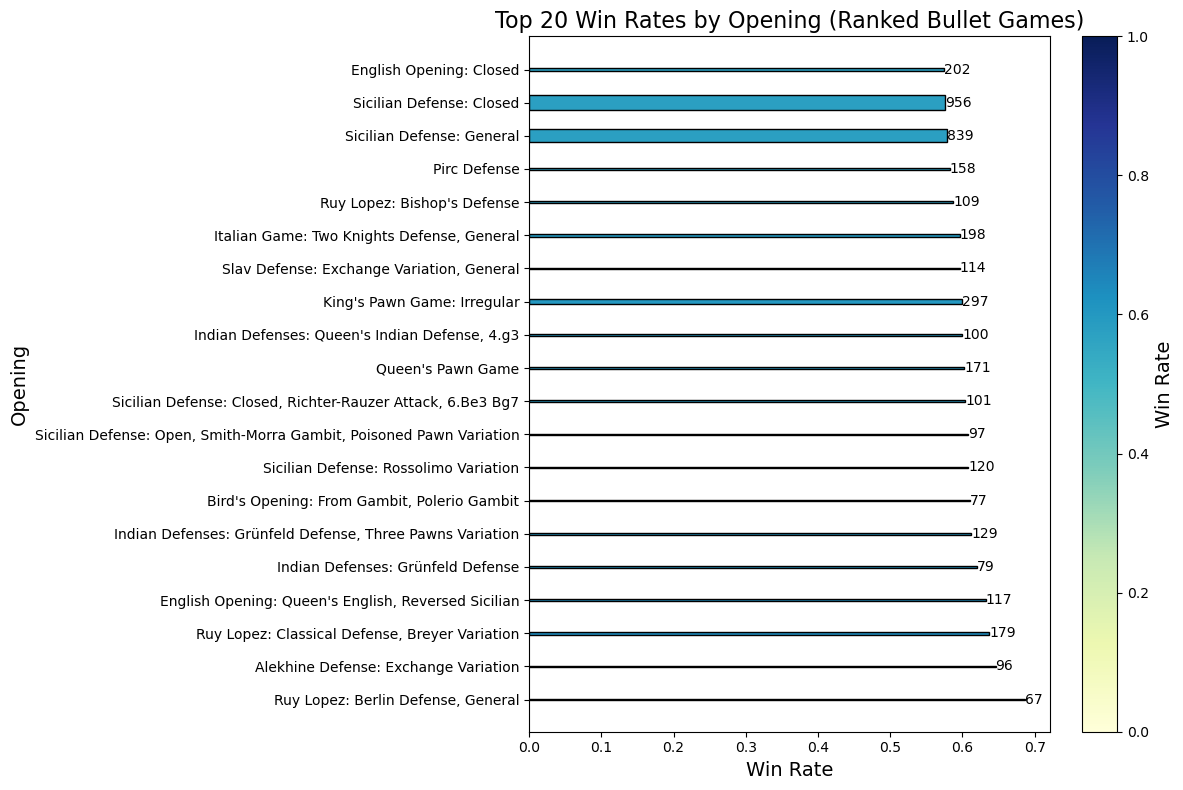

In [66]:
# Sort the opening stats by win rate in descending order and select the top 20
top_20_openings = opening_stats.sort_values('win_rate', ascending=False).head(20)

# Set up the color map based on win rate
cmap = plt.cm.get_cmap('YlGnBu')  # Color map

# Create a horizontal bar plot where each bar represents an opening
plt.figure(figsize=(12, 8))
colors = cmap(top_20_openings['win_rate'])
bars = plt.barh(top_20_openings.index, top_20_openings['win_rate'], 
                height=top_20_openings['normalized_size'], color=colors, edgecolor='black')

# Add annotations with game counts
for bar, count in zip(bars, top_20_openings['game_count']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{count}', va='center', ha='left', fontsize=10)

# Add labels and title
plt.title("Top 20 Win Rates by Opening (Ranked Bullet Games)", fontsize=16)
plt.xlabel("Win Rate", fontsize=14)
plt.ylabel("Opening", fontsize=14)

# Display the colorbar to indicate win rates
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=plt.gca())
cbar.set_label('Win Rate', fontsize=14)

plt.tight_layout()
plt.show()


# Do I perform same against high elo opponents?
- Null Hypothesis: I perform against opponents who have more than 2900 rating as good as against other ooponents.
- Alternative Hypothesis: I have decline in my performance

T-statistic: -23.388592384002916
P-value: 1.7631420696209118e-114
Reject the null hypothesis: There is a significant difference in win rates.


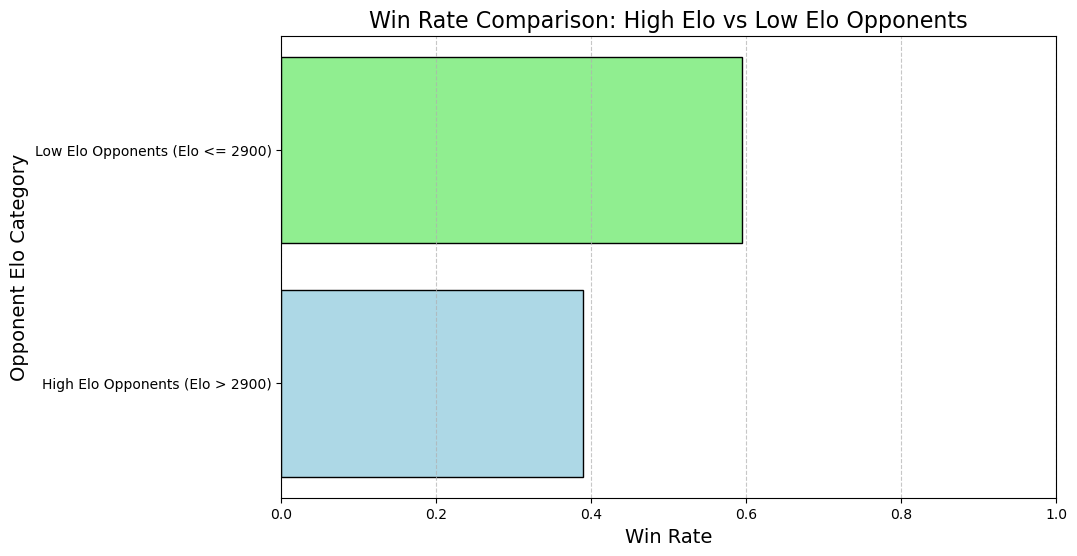

In [148]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Elo columns are treated as numerical values
ranked_bullet_df.loc[:, 'WhiteElo'] = pd.to_numeric(ranked_bullet_df['WhiteElo'], errors='coerce')
ranked_bullet_df.loc[:, 'BlackElo'] = pd.to_numeric(ranked_bullet_df['BlackElo'], errors='coerce')

# Define your nickname
nickname = 'legend2014'

# Determine if you're playing against an opponent with Elo > 2900
ranked_bullet_df.loc[:, 'OpponentElo'] = ranked_bullet_df.apply(
    lambda row: row['BlackElo'] if row['White'] == nickname else row['WhiteElo'], axis=1
)

# Define if the opponent's Elo is above 2900
ranked_bullet_df.loc[:, 'HighEloOpponent'] = ranked_bullet_df['OpponentElo'] > 2900

# Group 1: Win rates for high Elo opponents
df_high_elo = ranked_bullet_df[ranked_bullet_df['HighEloOpponent']]['ResultStatus']

# Group 2: Win rates for low Elo opponents
df_low_elo = ranked_bullet_df[~ranked_bullet_df['HighEloOpponent']]['ResultStatus']

# Perform the t-test for independent samples (high Elo vs low Elo)
t_stat, p_value = stats.ttest_ind(df_high_elo, df_low_elo, equal_var=False)

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation of the result
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in win rates.")
else:
    print("Fail to reject the null hypothesis: No significant difference in win rates.")

# Visualization: Horizontal bar plot of win rate comparison
labels = ['High Elo Opponents (Elo > 2900)', 'Low Elo Opponents (Elo <= 2900)']
win_rates = [df_high_elo.mean(), df_low_elo.mean()]

plt.figure(figsize=(10, 6))
plt.barh(labels, win_rates, color=['lightblue', 'lightgreen'], edgecolor='black')
plt.title("Win Rate Comparison: High Elo vs Low Elo Opponents", fontsize=16)
plt.xlabel("Win Rate", fontsize=14)
plt.ylabel("Opponent Elo Category", fontsize=14)
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# What is the reason of my success? Playing smart or playing fast

T-statistic: -57.641068370412036
P-value: 0.0
Reject the null hypothesis: Significant difference in win rates.


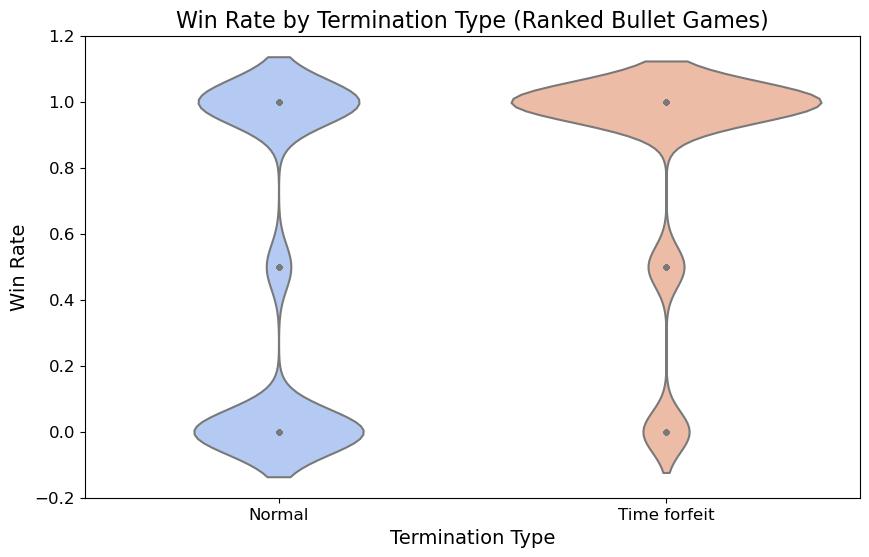

In [119]:
import numpy as np

# Ensure Elo columns are treated as numerical values
ranked_bullet_df = ranked_bullet_df.copy()
ranked_bullet_df['ResultStatus'] = ranked_bullet_df['ResultStatus'].map({'win': 1, 'loss': 0, 'draw': 0.5})
ranked_bullet_df = ranked_bullet_df.dropna(subset=['ResultStatus'])

# Check for empty groups
normal_termination = ranked_bullet_df[ranked_bullet_df['Termination'] == 'Normal']['ResultStatus']
time_forfeit = ranked_bullet_df[ranked_bullet_df['Termination'] == 'Time forfeit']['ResultStatus']

if normal_termination.empty or time_forfeit.empty:
    print("One of the groups is empty. Cannot perform t-test.")
else:
    # Perform the t-test for independent samples
    t_stat, p_value = stats.ttest_ind(normal_termination, time_forfeit, equal_var=False)
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("Reject the null hypothesis: Significant difference in win rates.")
    else:
        print("Fail to reject the null hypothesis: No significant difference in win rates.")

# Visualization: Violin plot
if not normal_termination.empty and not time_forfeit.empty:
    import seaborn as sns
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=ranked_bullet_df, x='Termination', y='ResultStatus', palette='coolwarm', inner="point")
    plt.title('Win Rate by Termination Type (Ranked Bullet Games)', fontsize=16)
    plt.xlabel('Termination Type', fontsize=14)
    plt.ylabel('Win Rate', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


# Machine Learning Model / Which factor has the bigges impact on my winrate?

Class distribution before oversampling:
ResultClass
 1    8400
-1    6213
 0    1195
Name: count, dtype: int64
Class distribution after oversampling:
ResultClass
 1    8400
-1    8400
 0    8400
Name: count, dtype: int64
Accuracy: 0.4377859778597786

Classification Report:
               precision    recall  f1-score   support

          -1       0.48      0.45      0.47      2808
           0       0.08      0.23      0.11       480
           1       0.59      0.46      0.51      3487

    accuracy                           0.44      6775
   macro avg       0.38      0.38      0.37      6775
weighted avg       0.51      0.44      0.47      6775

Accuracy: 0.4377859778597786

Classification Report:
               precision    recall  f1-score   support

          -1       0.48      0.45      0.47      2808
           0       0.08      0.23      0.11       480
           1       0.59      0.46      0.51      3487

    accuracy                           0.44      6775
   macro avg      

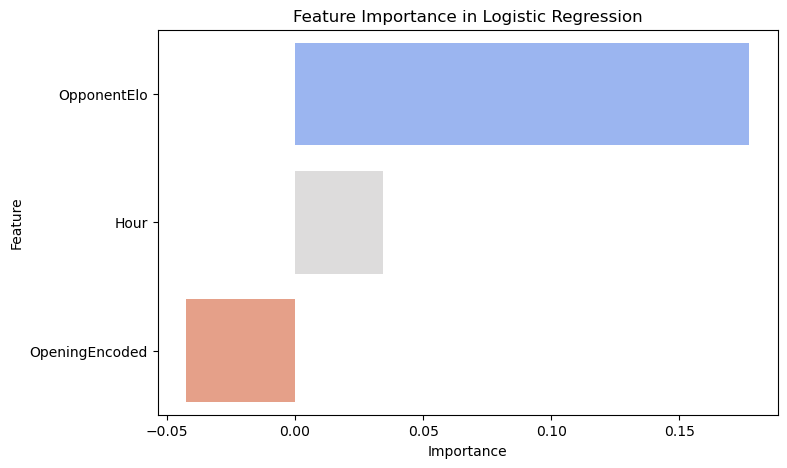

In [189]:
from imblearn.over_sampling import SMOTE  # For oversampling imbalanced classes

# Step 1: Check class distribution
print("Class distribution before oversampling:")
print(y_train.value_counts())

# Step 2: Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Class distribution after oversampling:")
print(pd.Series(y_train_resampled).value_counts())

# Step 3: Train the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

# Step 4: Evaluate the model
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Step 7: Evaluate the model
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Visualize feature importance
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': features, 'Importance': coefficients})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')
plt.title('Feature Importance in Logistic Regression')
plt.show()